## Section 1: OLS estimation and plotting


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Read in the data
possum_data=pd.read_csv('possum.csv')

### Part 1

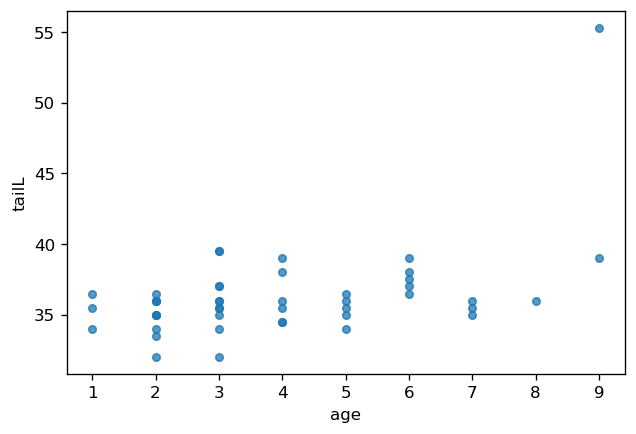

In [3]:
fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', 
                         y = 'tailL', 
                         alpha = 0.75,
                         ax = ax)

### Part 2

In [4]:
def linearModelPredict(b,X):
    yp = X@b
    return yp
    

### Part 3

In [5]:
def linearModelLossRSS(b,X,y):
    predY = linearModelPredict(b,X)
    res = y-predY
    residual_sum_of_squares = sum(res**2) 
    gradient=-2*(res @ X)
    return (residual_sum_of_squares, gradient)

### Part 4

In [6]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    nrows,ncols = X.shape
    betas=np.zeros((ncols,1))
    RES = so.minimize(lossfcn,betas,args=(X,y),jac=True)
    estimated_betas=RES.x 
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = linearModelLossRSS(estimated_betas,X,y)
    R2 = 1-RSS/TSS 
    return (estimated_betas,R2)

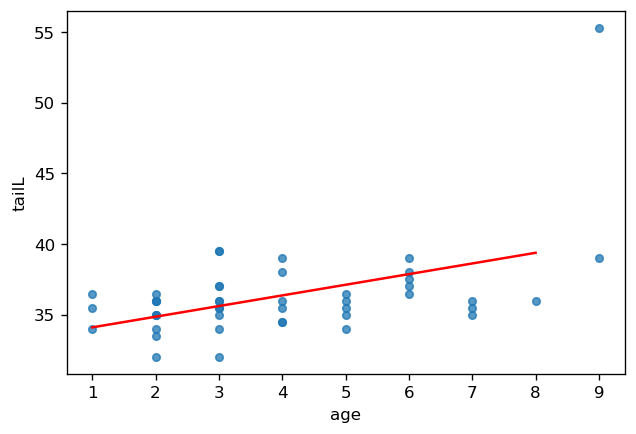

In [8]:
fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', 
                         y = 'tailL', 
                         alpha = 0.75,
                         ax = ax)

y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]
actual_betas, actual_R2 = linearModelFit(X,y)

age_grid = np.arange(age.min(), age.max())
Xn = np.c_[np.ones(age_grid.size), age_grid]
yn = Xn@actual_betas

ax.plot(age_grid, yn, color = 'red')

# Section 2: Least Absolute Deviation Loss

### Part 1


In [9]:
def linearModelLossLAD(b,X,y):
    predY = linearModelPredict(b,X)
    res = y-predY
    sres = np.sign(res); 
    sum_abs_dev = sum(abs(res))
    grad =- (sres @ X)
    return (sum_abs_dev,grad)

### Part 2

In [10]:
age = possum_data.age.values
X = np.c_[np.ones(age.size), age]
y = possum_data.tailL.values
b,R2 = linearModelFit(X,y,lossfcn=linearModelLossLAD)

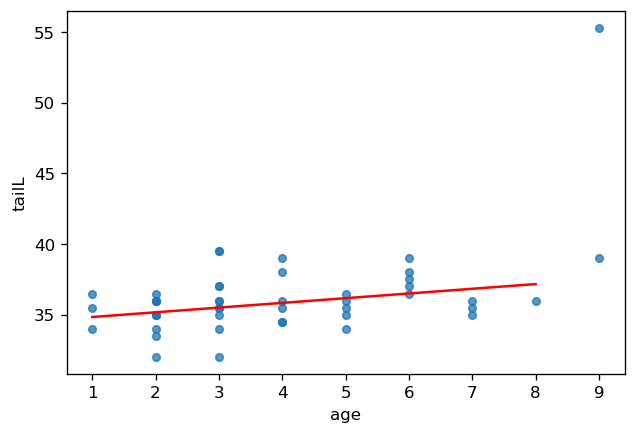

In [12]:
fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', 
                         y = 'tailL', 
                         alpha = 0.75,
                         ax = ax)

y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]
actual_betas, actual_R2 = linearModelFit(X,y, lossfcn = linearModelLossLAD)

age_grid = np.arange(age.min(), age.max())
Xn = np.c_[np.ones(age_grid.size), age_grid]
yn = Xn@actual_betas

ax.plot(age_grid, yn, color = 'red')

# Section 3

C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


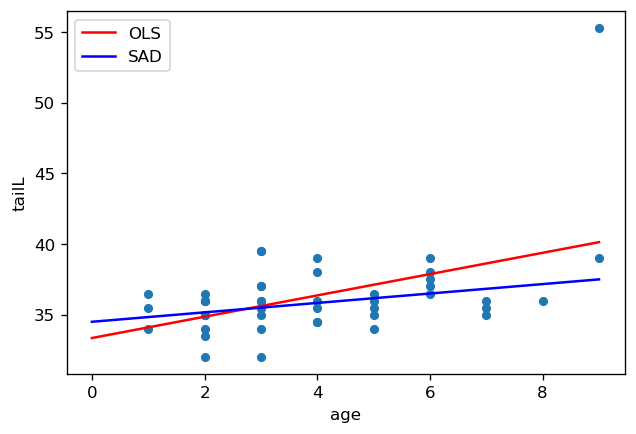

In [13]:
ols_fit = smf.ols('tailL~age', data = possum_data).fit()
sad_fit = smf.quantreg('tailL~age', data = possum_data).fit(q = 0.5)

fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', y ='tailL', ax = ax)

age = np.linspace(0,9,101)
y_ols = ols_fit.predict(exog = dict(age = age)).values
y_sad = sad_fit.predict(exog = dict(age = age)).values

ax.plot(age, y_ols, color = 'red', label = 'OLS')
ax.plot(age, y_sad, color = 'blue', label = 'SAD')
ax.legend()

**The differences:**

As we can see in the plot in which all of the four models (OLS, LAD, OLS by statsmodels, LAD by statsmodels) are plotted, the models of "OLS" and "OLS by statsmodels" are almost the same:

OLS b0: 33.35046603 b1: 0.75372837

OLS by statsmodels b0: 33.35046605 b1: 0.75372836

The same things is visible about "LAD" and "LAD by statsmodels" plots. They are almost the same as we can see:

LAD b0: 34.50470793 b1: 0.33291433

LAD by statsmodels b0: 34.5000 b1:0.3333

-The value of b0 (constant coefficient) is almost the same between all of the models (OLS_b0: 33 and LAD_b0: 34) -On the other hand, the value of b1 (x1 coefficient) is different between OLS models (0.75) and LAD models (0.33). There is a data point which is outlier. When we are using OLS model, this outlier can affect the model more than LAD model and that's why the value of x1 coefficient is different between OLS and LAD models . Also, the value of R2 (pseudo R2) for LAD models is almost zero (0.03058) which is great. For OLS model, the value of R2 is 0.2228658794760413 which is good, but not as good as OLS!